### Fundamentals of Data Analytics - Project Submission

Below is the problem as set:

In this project you must perform and explain simple linear regression using Python
on the powerproduction dataset available on Moodle. The goal is to accurately predict
wind turbine power output from wind speed values using the data set as a basis.
Your submission must be in the form of a git repository containing, at a minimum, the
following items:
1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance your submission, you might consider comparing simple linear regression to
other types of regression on this data set. Rest assured, all the above concepts will be
explored in lecture videos and other materials in the coming semester.


<b>

Below you will find my project submission, fitting a linear regression line to a dataset is straight forward and can be done on any set of data, however the accuracy of the model is the most important factor when assessing whether accurate predictions can be made.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

In [2]:
#Load  in the data set
wind_spd_pwr = pd.read_csv("powerproduction.csv")


In [3]:
#Let's take a quick look at the data included

wind_spd_pwr.head(5)

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0


In [4]:
wind_spd_pwr.tail(5)

,speed,power
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


So it looks like there are a lot a zero values from looking at the first and last 5 lines, lets take a look at the first 20 lines and see if we can get any better of an idea how the data in the power column are represented.

In [5]:
wind_spd_pwr. head(20)

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


Finally some results, these first an last 5 seem to have a caveat to them, possibly errors in the data collected. 

A quick insnull().sum() will tell us id there are any NaN or missing values in the dataset.

In [6]:
wind_spd_pwr.isnull().sum()

speed    0
power    0
dtype: int64

Looks like a full dataset, albeit with some odd values included in the results, as we saw above. I'm going to graph out the two columns in a scatter plot, the x-axis will reflect the speed column, and the y_axis will be the power column, a quick glance to see what the realtionship between these is.

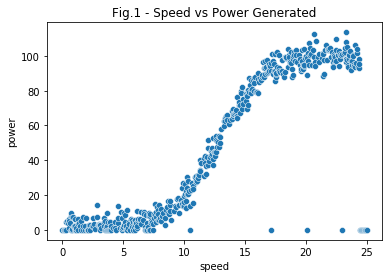

In [7]:
sns.scatterplot(x = wind_spd_pwr['speed'], y =wind_spd_pwr['power'])
plt.title("Fig.1 - Speed vs Power Generated");

The zero values we saw in the head and tail stand out on this graph completly, for the given speed there is no value given for power, where we would expect there to be much different values. It looks like these are definitely some error in the data, we may have to remove them further down the analysis. There is clearly some for of relationship at play here.

We can fit a linear least-squares regression line to the plot as per the below:

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html

In [8]:
stats.linregress(wind_spd_pwr)

LinregressResult(slope=4.917595665404666, intercept=-13.899902630519584, rvalue=0.8537775037188595, pvalue=2.8596889641543505e-143, stderr=0.1343783608511831)

Can I add each of the results as a variable and create the line on the plot?

In [9]:
slope, intercept, rvalue, pvalue, std=  stats.linregress(wind_spd_pwr)

Great, this should make graphing this regression line very simple.

In [54]:
x_axis = wind_spd_pwr['speed']
y_axis = wind_spd_pwr['power']

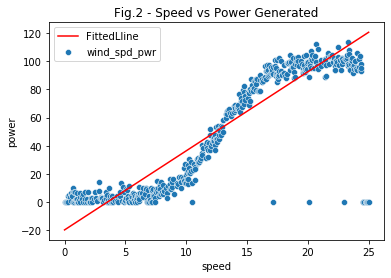

In [55]:
sns.scatterplot(x = wind_spd_pwr['speed'], y =wind_spd_pwr['power'], label = 'wind_spd_pwr')
plt.title("Fig.2 - Speed vs Power Generated")
plt.plot(x_axis, (slope*x_axis + intercept), 'r', label = 'FittedLline')
plt.legend();

The output *rvalue* of stats.linregress() will provide us with the coefficient of correlation, commonly called $r$, which will range from -1 to 1, where 0 means there is no relationship and 1 & -1 mean there is a 100% relationship. At this point it is worth noting that the fitted line is not a great for to the data, if we were to use the line as a guide on the dataset alone, we would find values which would fall outside the shape of the dataset.

In [12]:
#Print the rvalue of the dataset
rvalue

0.8537775037188595

There appears to be a fairly strong raltionship between the two, so we can probably make some preditions, while they may not be very accurate, we will intridcue the code here and then test how accurate the predictions are.

In order to make predictions for given inputs, we must first train the predictor on the dataset, once this has been completed we can provide an input to our trained predictor, and based off this training we can predict a result. We will use train_test_split(), from sklearn.model_selection:

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html 

sklearn.model_selection.train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)

train_test_split will accept a given indexable array, list, matrix or dataframe item(s), from this item will randomly select value pairs according to index in into 2 distinct groups called Train & Test. The train_size argument will denote what ratio (donated by a float between 0.0 and 1.0) train_test_split will assign these value pairs to our Train and Test groups. The ratio used below is 0.2, so for every 100 value pairs in our 'power' and 'speed' columns, 20 will be assigned to Test, and 80 will be assigned to Train.

There are 2 sub groups to each Train and Test, in our case  these sub groups are donated by X & y, representative of the values of each x,y point on our scatter plot, we have assigned these as variables as X_train, X_test, y_train, and y_test. X_train and y_train will be used to create a model of the data, and once this has been completed we can pass our X_test values through the model, and predict the corresponding y values using the model we previously trained. We can simply compare the output of this prediction to our existing y_test data and see how accurate the model we have created is.

To do this our columns will need to be split into two seperate variables.

In [13]:
# Split out our dataset into 2 variables, X & y, where X is the input and y is the output of our predictor.
X = wind_spd_pwr.iloc[:, :1].values
y = wind_spd_pwr.iloc[:, 1:].values

In [14]:
# Let's view these values and see if we ahve split these out as desired.
X

array([[ 0.   ],
       [ 0.125],
       [ 0.15 ],
       [ 0.225],
       [ 0.275],
       [ 0.325],
       [ 0.4  ],
       [ 0.45 ],
       [ 0.501],
       [ 0.526],
       [ 0.551],
       [ 0.576],
       [ 0.626],
       [ 0.676],
       [ 0.701],
       [ 0.726],
       [ 0.751],
       [ 0.801],
       [ 0.826],
       [ 0.851],
       [ 0.926],
       [ 0.951],
       [ 0.976],
       [ 1.001],
       [ 1.026],
       [ 1.051],
       [ 1.076],
       [ 1.101],
       [ 1.151],
       [ 1.251],
       [ 1.276],
       [ 1.301],
       [ 1.401],
       [ 1.426],
       [ 1.502],
       [ 1.552],
       [ 1.652],
       [ 1.677],
       [ 1.702],
       [ 1.827],
       [ 1.877],
       [ 1.902],
       [ 2.027],
       [ 2.077],
       [ 2.102],
       [ 2.177],
       [ 2.227],
       [ 2.252],
       [ 2.402],
       [ 2.477],
       [ 2.553],
       [ 2.578],
       [ 2.703],
       [ 2.828],
       [ 2.853],
       [ 2.953],
       [ 3.003],
       [ 3.028],
       [ 3.053

In [15]:
y

array([[0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [4.33100e+00],
       [5.18600e+00],
       [3.82600e+00],
       [1.04800e+00],
       [5.55300e+00],
       [6.49800e+00],
       [5.24100e+00],
       [4.22000e+00],
       [7.97400e+00],
       [9.74600e+00],
       [0.00000e+00],
       [0.00000e+00],
       [7.27100e+00],
       [7.95000e-01],
       [7.35000e+00],
       [1.99600e+00],
       [1.60900e+00],
       [2.06400e+00],
       [6.51100e+00],
       [0.00000e+00],
       [2.08500e+00],
       [0.00000e+00],
       [1.21000e-01],
       [1.20800e+00],
       [3.37300e+00],
       [6.51000e+00],
       [0.00000e+00],
       [4.15600e+00],
       [2.00500e+00],
       [5.35200e+00],
       [0.00000e+00],
       [7.22100e+00],
       [0.00000e+00],
       [2.43900e+00],
       [0.00000e+00],
       [2.35900e+00],
       [7.04800e+00],
       [0.00000e+00],
       [0.00000e+00],
       [0.00000e+00],
       [2.

We now split the data into data which will train the model and then the remaing sets of data will be used to test our acuracy.

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
y_pred = lin_reg.predict(X_test)

From looking at our predictor output we can see there are some very odd results, going into negatives, which would be ground-breaking from a physics standpoint I'm sure. So it looks lime our model is not extremely accurate, but can we put a figure to that level of accuracy? One way is to get a value called the $r^2$ value, which provides an output between 0 and 1, with 1 being a perfect fit.

r2_score below loaded from sklearn.metrics:
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html

In [19]:
r2_score(y_test, y_pred)

0.7066904808136409

### Model Evaluation Metrics for Regression

Another metric we can use to analyse what kind of fit our regression line to the model we have created.

https://www.ritchieng.com/machine-learning-evaluate-linear-regression-model/

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

$\sqrt{\frac{1}{n}\sum_{i=1}^n(y_{i}−\hat{y}_{i})^2}$

The RMSE essentially is the score for how the model's predicted values of will fit to the observed data points. There is no good or bad value for this metric, it is relative to the size of the values in the observed results, a RMSE of 0 will mean the predictor receive a perfect fit on the pbserved results.

In [21]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

22.279880981788637

Let's define our test split regresson in a formula so we can just call the function to provide us with the results

In [57]:
def linear_reg_split(X, y, split_ratio):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=split_ratio, random_state=0)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    y_pred = lin_reg.predict(X_test)
    return  y_test, y_pred

def r2(y_test, y_pred):
    r2 = r2_score(y_test, y_pred)
    return r2

def rmse(y_test, y_pred):
    mse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    return mse

Test of the formula below

In [23]:
X = wind_spd_pwr.iloc[:, :1].values
y = wind_spd_pwr.iloc[:, 1:].values

In [58]:
y_test, y_pred = linear_reg_split(X,y, 0.2)

### Cleaning up the dataset

As I mentione dabove the dataset appears to have some undesirable results included, in both Fig.1 & Fig.2 you can see a few point on the plot at the (x= n, y= 0) points which I deem to affect the accuracy of the overall prediction, let's remove these and see if we can improve our evaluation metrics. From researching wind turbine power output in relation to wind speed, I found that often wind turbines produce power in a specfic range of wind speeds:

       "6. How strong does the wind have to blow for the wind turbines to work?
    Wind turbines typically start operating at wind speeds around Beaufort Force 3 (which is around 3-5 metres per second (m/s), or 8-12 miles per hour (mph). Turbines reach maximum power output at Beaufort 5 (around 11-14 m/s or 25-30 mph). At very high wind speeds, i.e. Beaufort Storm Force 10 winds, (around 24 m/s or 55 mph) or greater the wind turbines shut down to prevent excessive wear and tear. Since winds of this strength occur only for a handful of hours per year, very little energy is lost in high wind periods."

https://enerpower.ie/portfolio/wind-turbine-faq-ireland/

We will need to be mindful of this when creating the final output of the predictor, for now we will remove all rows which ahve zero vlaues. We will need to factor these thresholds into the our predictor

In [25]:
#https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame

clean_df = wind_spd_pwr.loc[(wind_spd_pwr != 0).all(1)]

How many zero values were influencing the results above?

In [26]:
wind_spd_pwr.shape[0] - clean_df.shape[0]

49

About one in ten results were zero vals, but we know that our first 5 and last 10 rows contain valid zeros vals. Below we will grpah the newly created 'clean_df', so there were 34 zero-values cleared from the dataset. Let's see if we have imporoved the rvalue of the dataset:

In [27]:
slope, intercept, rvalue, pvalue, std = stats.linregress(clean_df)
rvalue

0.9478835830699073

This is a fairly substantial improvement.

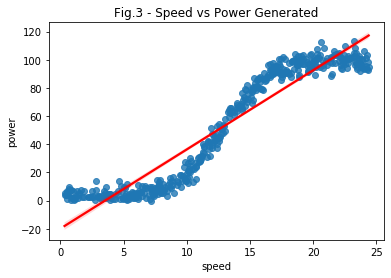

In [28]:
ax = sns.regplot(x = clean_df['speed'], y = clean_df['power'], data = clean_df, x_ci = False, line_kws={"color": "red"})
plt.title("Fig.3 - Speed vs Power Generated")
plt.show();

As above we will perofrm a liner regression on the dataset and evaluate how accurate the predictions we can make will be, firstly using a 0.20 test_split, and moving to a 0.10 test split to see if we can improve the accuracy.

In [29]:
X = clean_df.iloc[:, :1].values
y = clean_df.iloc[:, 1:].values
clean_df_y_test, clean_df_y_pred = linear_reg_split(X,y, 0.2)

In [30]:
r2(clean_df_y_test, clean_df_y_pred)

0.8761936527051459

In [31]:
rmse(clean_df_y_test, clean_df_y_pred)

13.969373738027821

### Predicting Power Output values

I am going to apply a linear regression model to the whole clean_df dataset and make predictions off the back of this model. However tese predictions will not be very accurate for wind speeds roughly between 5m/s to 11 m/s & 15m/s to 18m/s given the loose fit a straight line has on the data provided.

In [32]:
X = clean_df.iloc[:, :1].values
y = clean_df.iloc[:, 1:].values

In [33]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
lin_reg.score(X, y)

0.8984832870534454

Now we can request a user's input, reshape it to to enure the same shape is input as was passed through fit() and our model will predict the power output value of the input.

In [35]:
speed_input = np.array(15).reshape(-1, 1)
speed_input

array([[15]])

In [36]:
y_pred = lin_reg.predict(speed_input)
y_pred

array([[64.44473211]])

Tidying up the function into something that can be run idependently.

In [62]:
def linear_reg_predict(speed_input):
    
    if speed_input < 0.325:
        return 0

    if speed_input > 24.498:
        return 0
    
    else:
        from sklearn.linear_model import LinearRegression
    
        wind_spd_pwr = pd.read_csv("powerproduction.csv")
    
        clean_df = wind_spd_pwr.loc[(wind_spd_pwr != 0).all(1)]
    
        X = clean_df.iloc[:, :1].values
        y = clean_df.iloc[:, 1:].values
    
        lin_reg = LinearRegression()
        lin_reg.fit(X, y)
        reshape_sp_input = np.array(speed_input).reshape(-1, 1)
        power_output = lin_reg.predict(reshape_sp_input)
        return  power_output

In [64]:
linear_reg_predict(22)

array([[103.77652698]])

### Different Types of Regression

At first when I was researching what other types of regression oculd fit the dataset, a logistic regression seemed to fit given the shape of the plotted datapoints. Upon reading further it was evident that this eas not the case. Upon further investigation, I foudnt hat a polynomical regression may fir the dataset to a better degree than a linear fit, below is an analysis of what the r2 score and RMSE will be after fitting a polynomial regreession to the powerproduction dataset, with zero values removed (clean_df).

https://www.w3schools.com/python/python_ml_polynomial_regression.asp

https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

In [39]:
X = clean_df.iloc[:, :1].values
y = clean_df.iloc[:, 1:].values

In [40]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

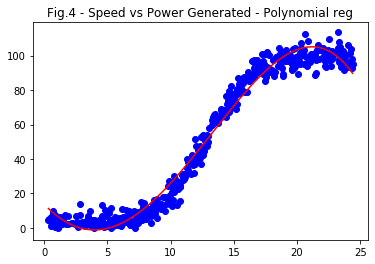

In [42]:
plt.scatter(X, y, color='blue')
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='red')
plt.title("Fig.4 - Speed vs Power Generated - Polynomial reg");

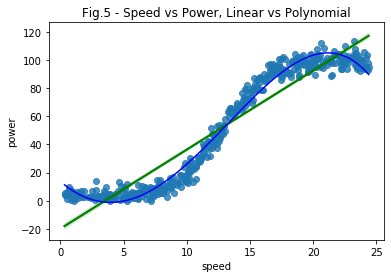

In [43]:
ax = sns.regplot(x = clean_df['speed'], y = clean_df['power'], data = clean_df, x_ci = False, line_kws={"color": "green"})
plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
plt.title("Fig.5 - Speed vs Power, Linear vs Polynomial")
plt.show();

### Conclusions 

The objectives of this project were to:

##### Perform and explain a simple linear regression on the powerporduction dataset provided.

   I believe fitting the line was stright forward and did not need much further work, I do not know if there was a better way to clean up the dataset, but thought if statements regarding the thresholds was the simplest way to work it.

##### Accurately predict wind tuerbine power output from windspeed values using the dataset.
   
   The prediction model is not accurate for a linear regression, espoecially around the areas where the line cuts through the whitespace on the graphs. I could not quite work the polynomial regression model into a predictor, burt the model fit was perfect for the dataset provided, it appears that the dataset was produced from a polynomial function.